## Prediction of Asteroid Diameter

# Define a XGBOOST model for finding the diameter of an asteroid

In [1]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 20

In [2]:
df = pd.read_csv('Asteroid_Updated.csv',low_memory=False)

In [3]:
ROWS, COLUMNS = df.shape

print(df.shape)
print('\nRows: ', ROWS, '\nColumns: ', COLUMNS)

(839714, 31)

Rows:  839714 
Columns:  31


In [4]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

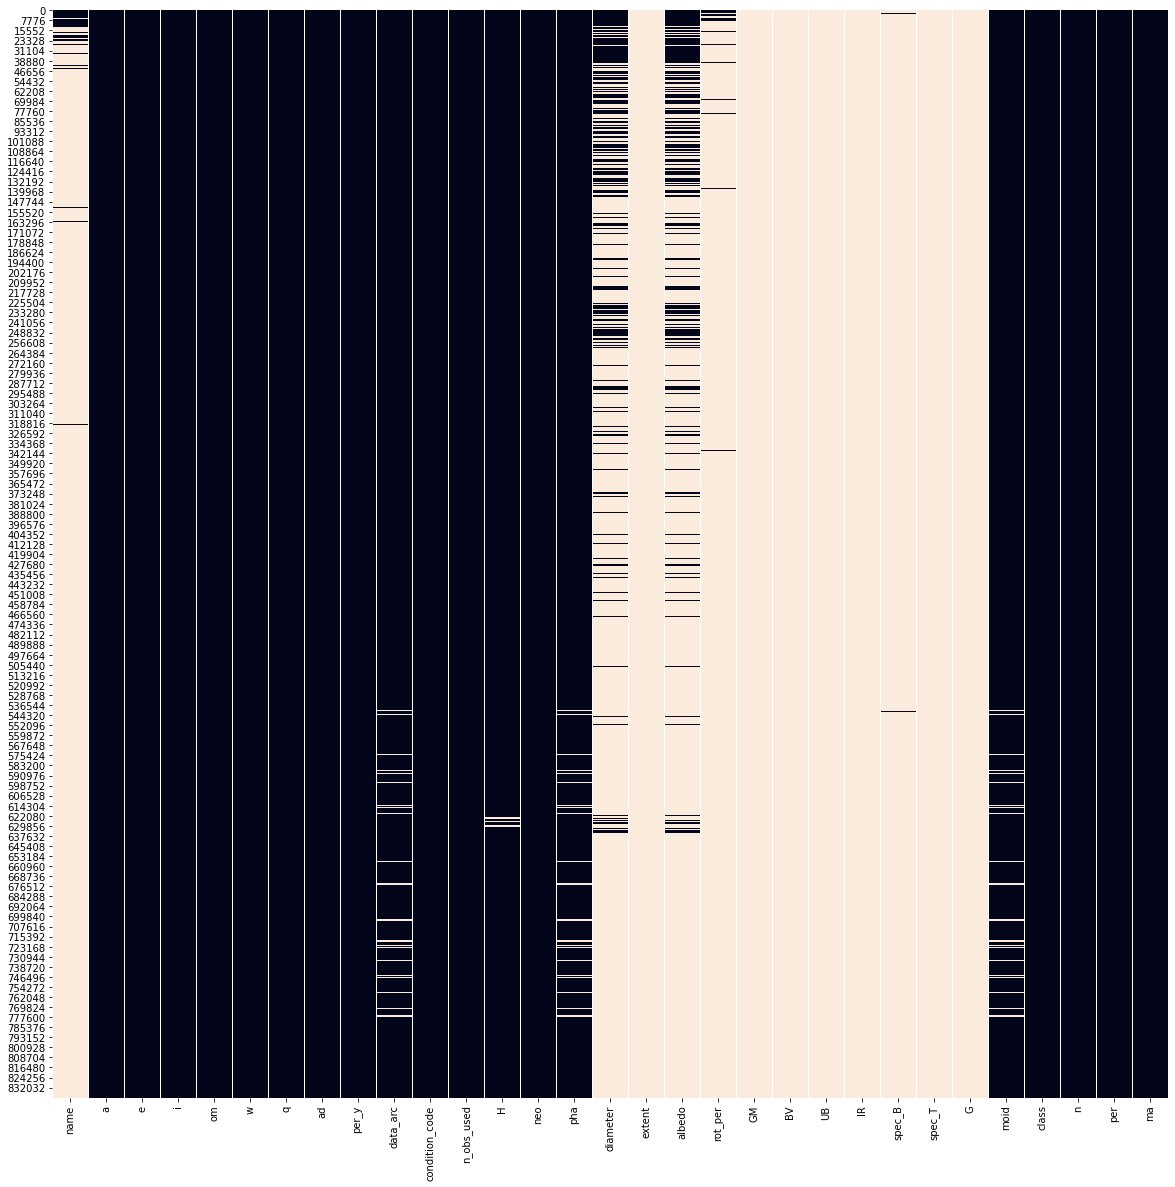

In [6]:
sns.heatmap(df.isnull(), cbar = False)

In [7]:
df.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
count,839712.000000,839714.000000,839714.000000,839714.000000,839714.000000,839714.000000,839708.000000,839713.000000,824240.000000,839714.000000,...,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,119.000000,8.232720e+05,8.397120e+05,8.397080e+05,839706.000000
mean,2.757514,0.155636,8.949826,168.499466,181.075796,2.404728,3.385710,6.859734,5688.422331,259.191837,...,21.136772,7.821928e+00,0.769212,0.364396,-0.33,0.178739,1.423371e+00,2.374145e-01,2.505533e+03,180.659892
std,114.384959,0.093897,6.666087,103.096307,104.023854,2.233172,12.748733,252.264249,4208.177231,371.759667,...,73.131751,1.678880e+01,0.088625,0.095780,NaN,0.134603,2.250450e+00,8.095014e-02,9.213979e+04,106.562235
min,-104279.220900,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,...,0.004389,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,3.440000e-07,2.930000e-08,1.511339e+02,-67.136826
25%,2.385258,0.091454,4.069077,80.211400,91.041603,1.971941,2.775350,3.683928,3608.000000,50.000000,...,4.210000,1.022000e-03,0.700000,0.289000,-0.33,0.100000,9.784998e-01,1.900553e-01,1.345555e+03,86.642618
50%,2.644219,0.143655,7.257101,160.294860,181.669478,2.225510,3.037761,4.299859,5806.000000,118.000000,...,6.653000,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.237810e+00,2.292228e-01,1.570524e+03,181.517775
75%,2.996048,0.199400,12.255653,252.201519,271.521717,2.578162,3.357967,5.185985,7270.000000,296.000000,...,12.624250,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.590560e+00,2.675475e-01,1.894184e+03,274.301731
max,3043.149073,1.201134,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712700,72684.000000,9325.000000,...,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,7.950130e+01,2.381994e+00,6.131733e+07,491.618014


In [8]:
df.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [9]:
print(df.shape)
dftemp = df[df.diameter.notnull()]
df = dftemp
print(df.shape)


(839714, 31)
(137636, 31)


In [10]:
df = df.drop(columns=['IR'])
df = df.drop(columns=['data_arc'])
df = df.drop(columns=['extent'])

In [11]:
df = df.drop(columns=['rot_per'])
df = df.drop(columns=['G'])
df = df.drop(columns=['UB'])
df = df.drop(columns=['BV'])
df = df.drop(columns=['spec_T'])

In [12]:
df = df.drop(columns=['spec_B'])

In [13]:
df = df.drop(columns=['name'])
df = df.drop(columns=['GM'])

In [15]:
df.albedo = df.albedo.fillna(df.albedo.mean())
df.H = df.H.fillna(df.H.mean())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137636 non-null  float64
 1   e               137636 non-null  float64
 2   i               137636 non-null  float64
 3   om              137636 non-null  float64
 4   w               137636 non-null  float64
 5   q               137636 non-null  float64
 6   ad              137636 non-null  float64
 7   per_y           137636 non-null  float64
 8   condition_code  137636 non-null  object 
 9   n_obs_used      137636 non-null  int64  
 10  H               137636 non-null  float64
 11  neo             137636 non-null  object 
 12  pha             137636 non-null  object 
 13  diameter        137636 non-null  object 
 14  albedo          137636 non-null  float64
 15  moid            137636 non-null  float64
 16  class           137636 non-null  object 
 17  n         

In [19]:
ar = df.diameter.values
ls = []
for i in ar:
    
    s=float(i)
    s=round(s)
    s=int(s)
    s=str(s)
    n=''
    for j in s:
        if j!=' ':
            n+=j
    
    a = int(n)
    ls+=[a]
    
#df.loc[:]['diameter']=ls
df.diameter = ls
df.diameter

0         939
1         545
2         247
3         525
4         107
         ... 
797860      4
798077      3
798189      3
799752      3
810375      2
Name: diameter, Length: 137636, dtype: int64

In [20]:
df.diameter = df.diameter.apply(pd.to_numeric)

In [21]:
df.diameter

0         939
1         545
2         247
3         525
4         107
         ... 
797860      4
798077      3
798189      3
799752      3
810375      2
Name: diameter, Length: 137636, dtype: int64

In [22]:
df.info

<bound method DataFrame.info of                a         e          i          om           w         q  \
0       2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1       2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2       2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3       2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4       2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   
...          ...       ...        ...         ...         ...       ...   
797860  3.171225  0.159119  27.098625  309.036573   19.746812  2.666623   
798077  2.548410  0.076071  11.593237  246.298656  170.090810  2.354549   
798189  3.146246  0.220559  17.966646  137.981403  180.898832  2.452313   
799752  3.051336  0.287449  14.456779  343.917822  342.614839  2.174231   
810375  2.417477  0.109001   4.525668  148.244819   31.949854  2.153970   

              ad     per_y condition_code  n_obs_used      H neo ph

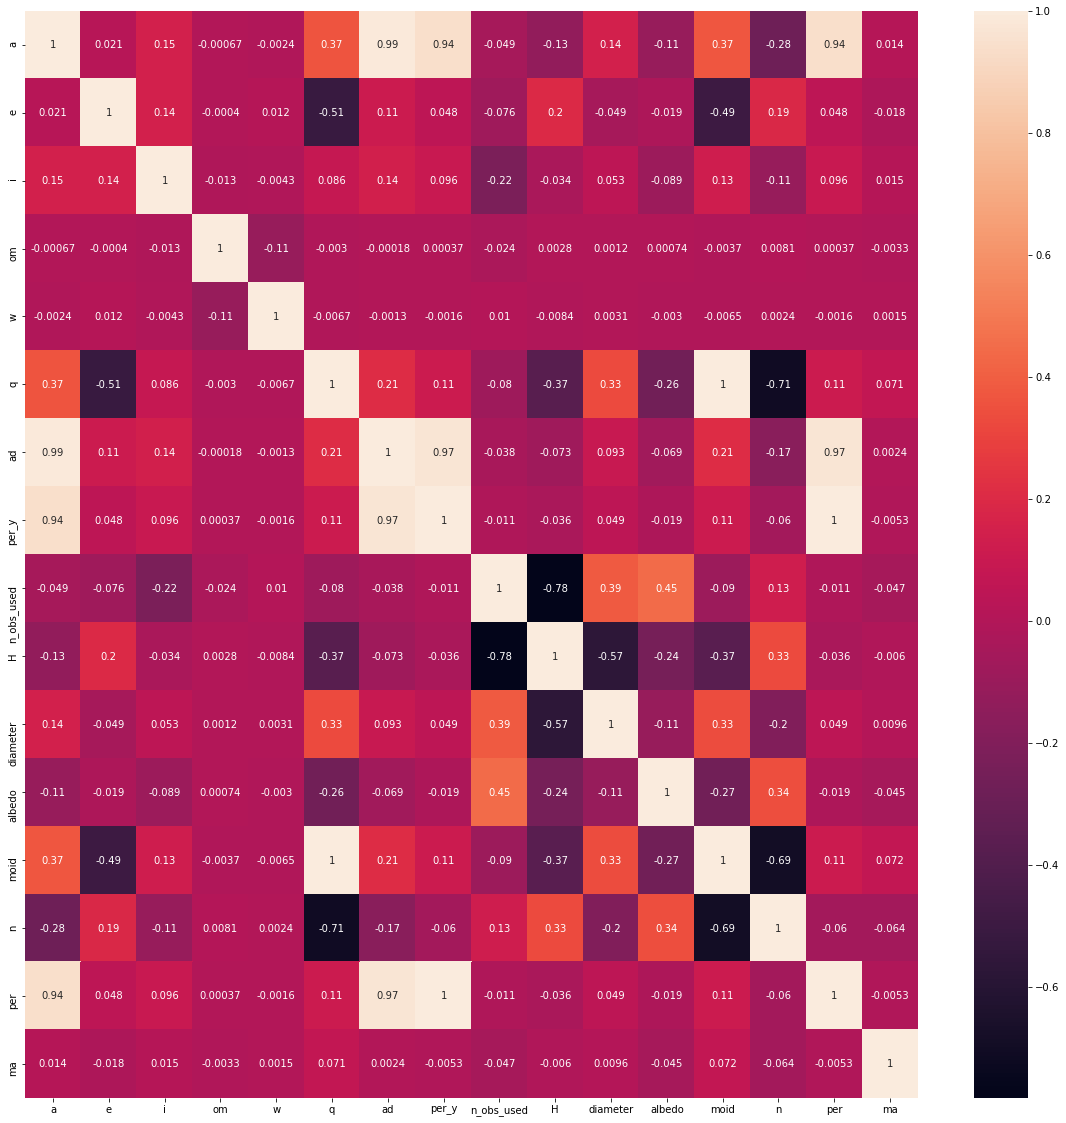

In [23]:
import seaborn as sns
sns.heatmap(df.corr(),annot = True)

Text(0, 0.5, 'Features')

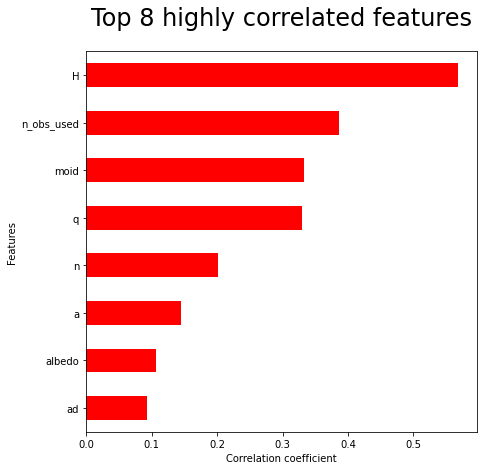

In [24]:
plt.figure(figsize = (7,7))
df.corr().diameter.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:9][::-1].plot(kind='barh', color='red')
plt.title('Top 8 highly correlated features', size=24,pad=26)
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')

Text(0, 0.5, 'Features')

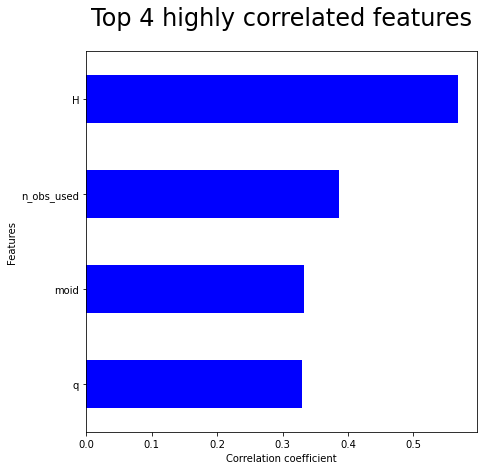

In [26]:
plt.figure(figsize = (7,7))
df.corr().diameter.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:5][::-1].plot(kind='barh', color='blue')
plt.title('Top 4 highly correlated features', size=24,pad=26)
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')

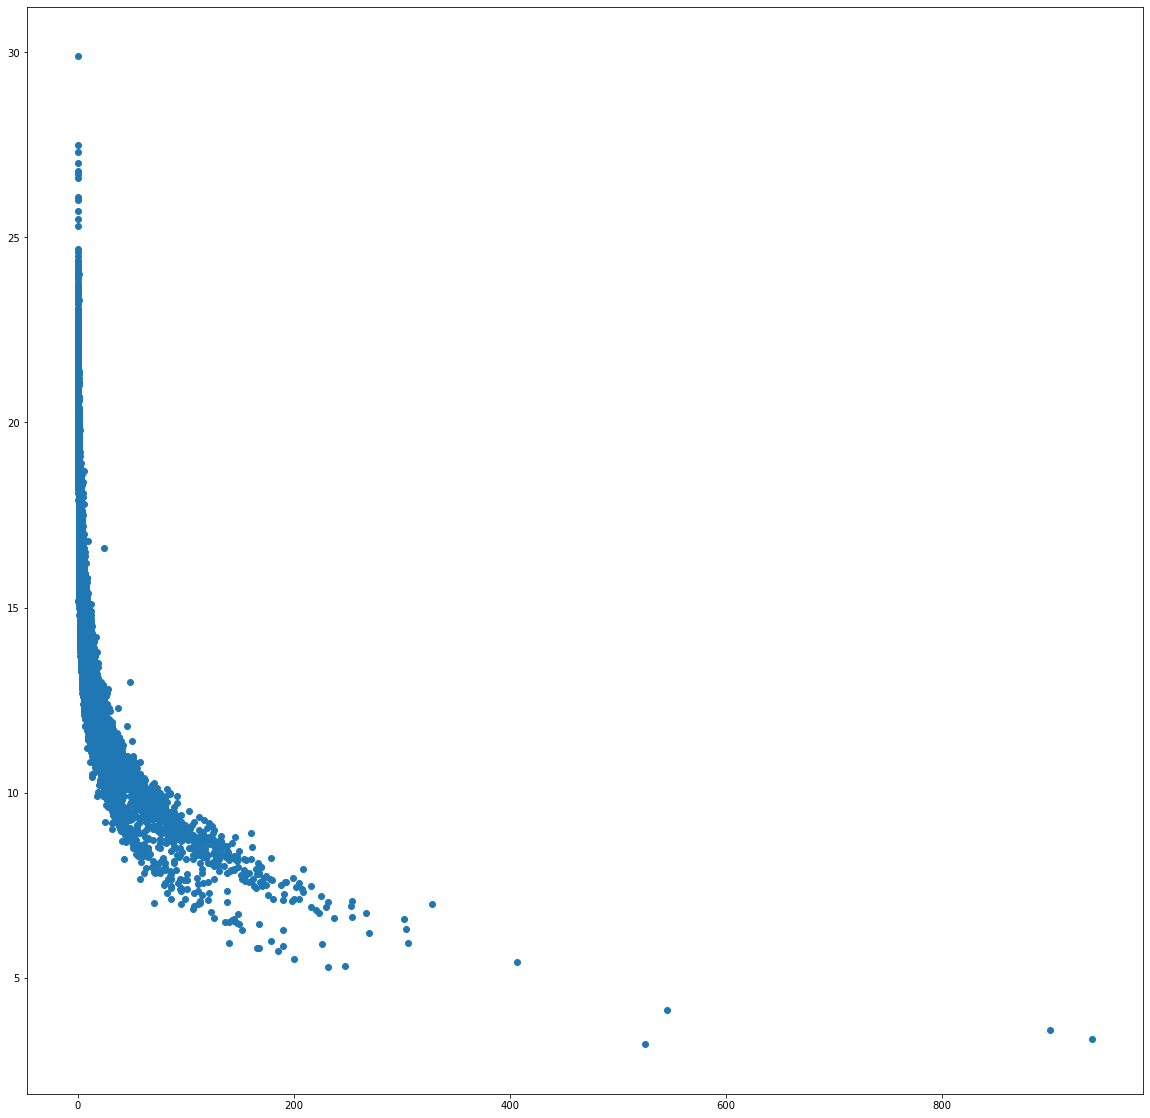

In [27]:
plt.scatter(df.diameter,df.H)

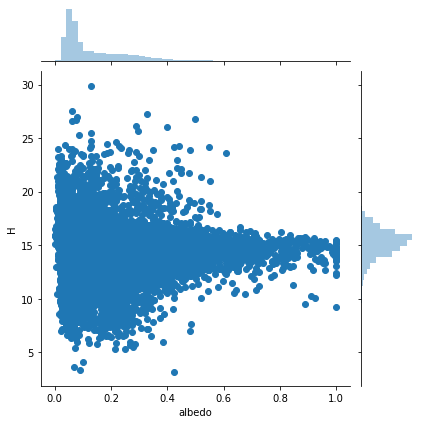

In [28]:
sns.jointplot(df.albedo,df.H)

In [29]:
df.corr()[abs(df.corr().diameter)>0.4].index

Index(['H', 'diameter'], dtype='object')

In [30]:
#col = ['a', 'q', 'n_obs_used', 'H', 'moid', 'per', 'per_y','ad']
col = ['H']

In [40]:
from xgboost import XGBRegressor as clf

In [41]:
clf()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [39]:
col = [ 'q', 'n_obs_used', 'H', 'moid']
X = df[col]
y = df.diameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
model = clf()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

print(accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))

0.3254946598532368
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       106
           1       0.29      0.30      0.30       993
           2       0.50      0.50      0.50      6918
           3       0.41      0.41      0.41      8919
           4       0.32      0.34      0.33      7539
           5       0.28      0.30      0.29      5411
           6       0.21      0.21      0.21      3564
           7       0.19      0.18      0.18      2127
           8       0.17      0.14      0.15      1462
           9       0.18      0.17      0.18       873
          10       0.19      0.17      0.18       632
          11       0.11      0.07      0.09       473
          12       0.14      0.10      0.11       370
          13       0.13      0.16      0.15       262
          14       0.11      0.08      0.09       216
          15       0.10      0.13      0.11       149
          16       0.15      0.08      0.11       158
        

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---

# end

---